# Image Compression with K Means

In [25]:
!pip install plotly

In [26]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
from sklearn.datasets import make_blobs 
from sklearn.preprocessing import StandardScaler
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [27]:
np.random.seed(0)

In [49]:
original_img=plt.imread('kingfisher-bird.jpg')

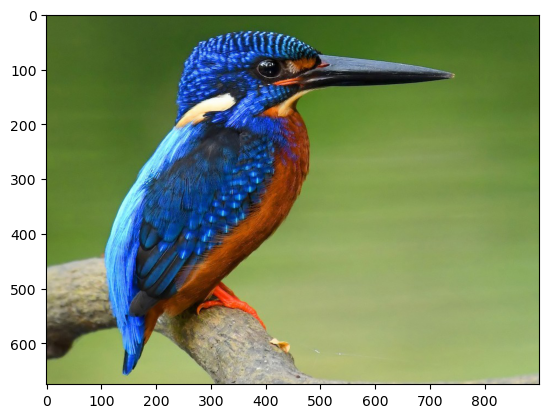

In [50]:
plt.imshow(original_img)
plt.show()

In [30]:
original_img.shape

(675, 900, 3)

In [31]:
#original_img=original_img/255

In [32]:
X_img=np.reshape(original_img, (original_img.shape[0]*original_img.shape[1], 3))

In [33]:
K=16
k_means=KMeans(init="k-means++", n_init = 12, n_clusters=K)

In [34]:
k_means.fit(X_img)

KMeans(n_clusters=16, n_init=12)

In [35]:
k_means_labels=k_means.labels_
k_means_labels

array([11, 11, 11, ..., 10, 10, 10], shape=(607500,), dtype=int32)

In [36]:
k_means_cluster_centers=k_means.cluster_centers_
k_means_cluster_centers

array([[183.73449163,  80.86859717,  24.25842986],
       [149.12434645, 169.75520401, 100.72963596],
       [101.94859148, 134.0860931 ,  54.10872723],
       [ 33.6213562 ,  52.70198753,  80.89142634],
       [135.464     , 218.42606061, 248.61854545],
       [ 28.74519034,  85.92577432, 200.84636376],
       [ 63.93792042,  95.47299798,  32.91334797],
       [ 32.48302779,  28.985137  ,  26.72276759],
       [130.97688271, 154.23945698,  81.00161922],
       [110.91269757,  48.22366607,  12.28344118],
       [200.244304  , 195.05576504, 172.20346274],
       [ 81.71510855, 112.21520145,  41.44448097],
       [ 20.40842675,  65.25235137, 134.48238642],
       [168.56728834, 180.3804254 , 118.4727385 ],
       [ 77.0442953 , 145.83516779, 241.69252796],
       [115.47965265, 136.74561553, 157.94227822]])

In [37]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np

def plot_kMeans_RGB_3D(X_img, centroids, labels, K):
    """
    Plot pixels in 3D RGB space and mark KMeans cluster centers.
    
    Parameters:
    - X_img: np.array of shape (num_pixels, 3)
    - centroids: np.array of shape (K, 3)
    - labels: np.array of shape (num_pixels,)
    - K: Number of clusters
    """
    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')
    ax.set_title("Original Colors and Cluster Centroids in RGB Space", fontsize=14)

    # Plot all pixels in RGB space with original colors
    ax.scatter(
        X_img[:, 0], X_img[:, 1], X_img[:, 2],
        color=X_img / 255.0, marker='.', alpha=0.4, s=1
    )

    # Plot cluster centroids
    ax.scatter(
        centroids[:, 0], centroids[:, 1], centroids[:, 2],
        color=centroids / 255.0, marker='X', s=400,
        edgecolors='white', linewidths=2
    )

    # Set axis labels
    ax.set_xlabel('R value - Redness')
    ax.set_ylabel('G value - Greenness')
    ax.set_zlabel('B value - Blueness')

    # Set axis limits for full view
    ax.set_xlim(0, 255)
    ax.set_ylim(0, 255)
    ax.set_zlim(0, 255)

    # Better angle for viewing
    ax.view_init(elev=30, azim=135)

    # Show plot
    plt.tight_layout()
    plt.show()


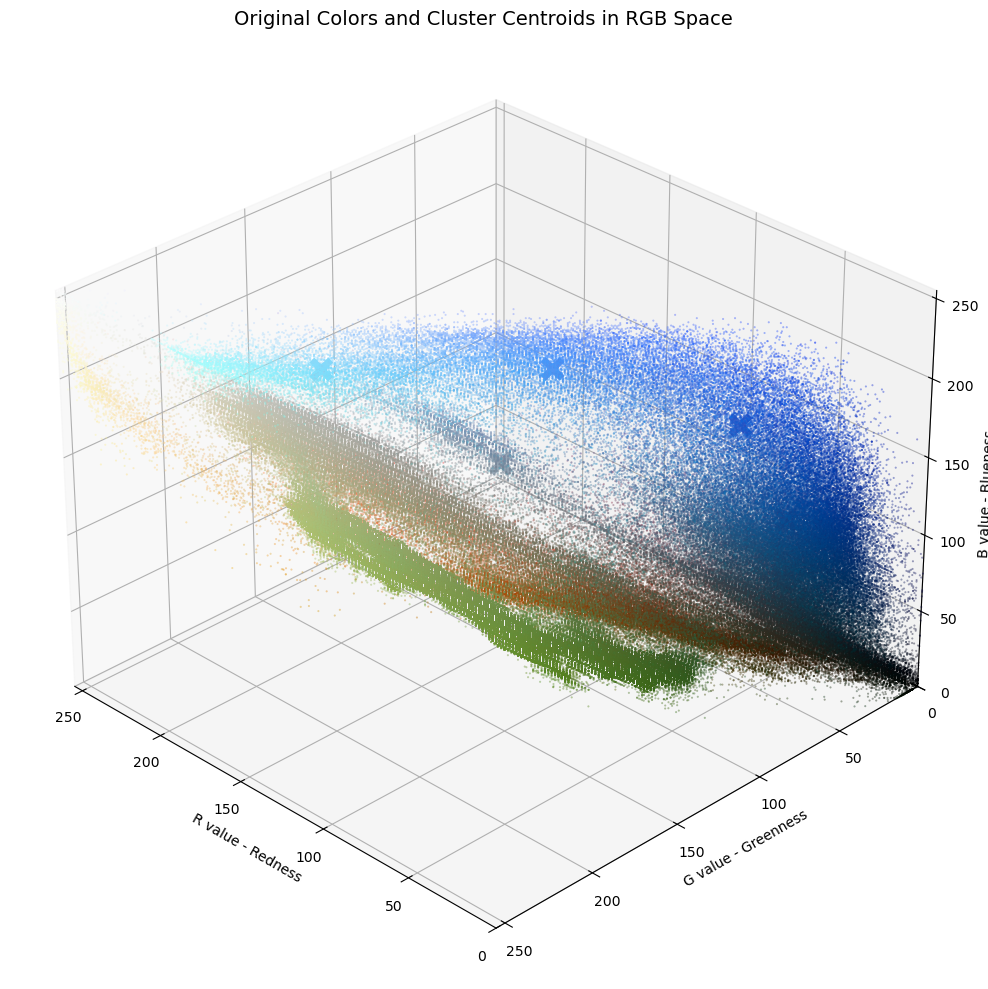

In [38]:
plot_kMeans_RGB_3D(X_img, k_means_cluster_centers, k_means_labels, K)

In [39]:
X_recovered=k_means_cluster_centers[k_means_labels, :]

In [40]:
X_recovered=np.reshape(X_recovered, original_img.shape)

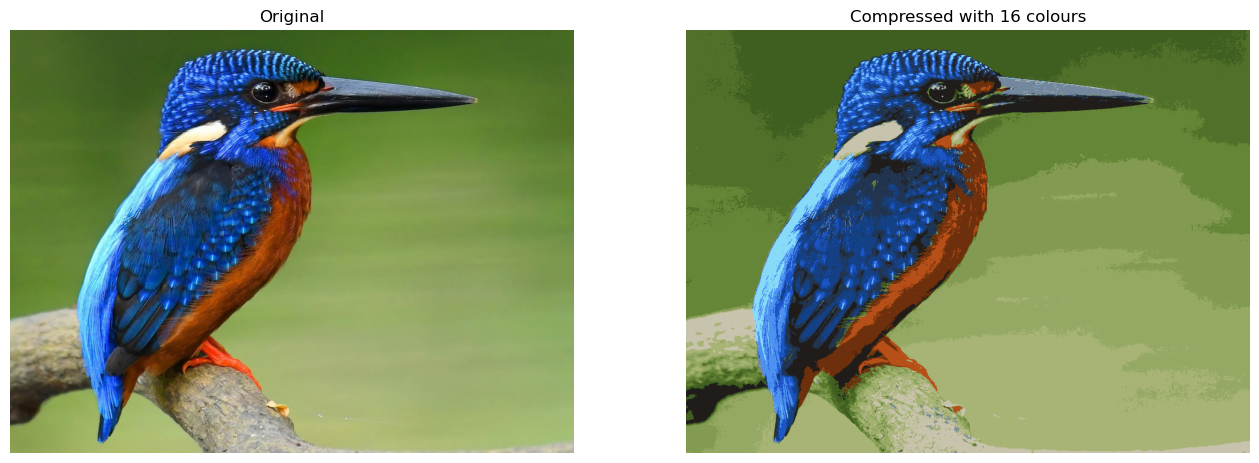

In [41]:
# Display original image
fig, ax = plt.subplots(1,2, figsize=(16,16))
plt.axis('off')

ax[0].imshow(original_img)
ax[0].set_title('Original')
ax[0].set_axis_off()


# Display compressed image
ax[1].imshow(X_recovered/255)
ax[1].set_title('Compressed with %d colours'%K)
ax[1].set_axis_off()

plt.show()

In [42]:
K=10
k_means_2=KMeans(init="k-means++", n_init = 12, n_clusters=K)
k_means_2.fit(X_img)
k_means_2_labels=k_means_2.labels_
k_means_2_cluster_centers=k_means_2.cluster_centers_
X_recovered_2=k_means_2_cluster_centers[k_means_2_labels, :]
X_recovered_2=np.reshape(X_recovered_2, original_img.shape)

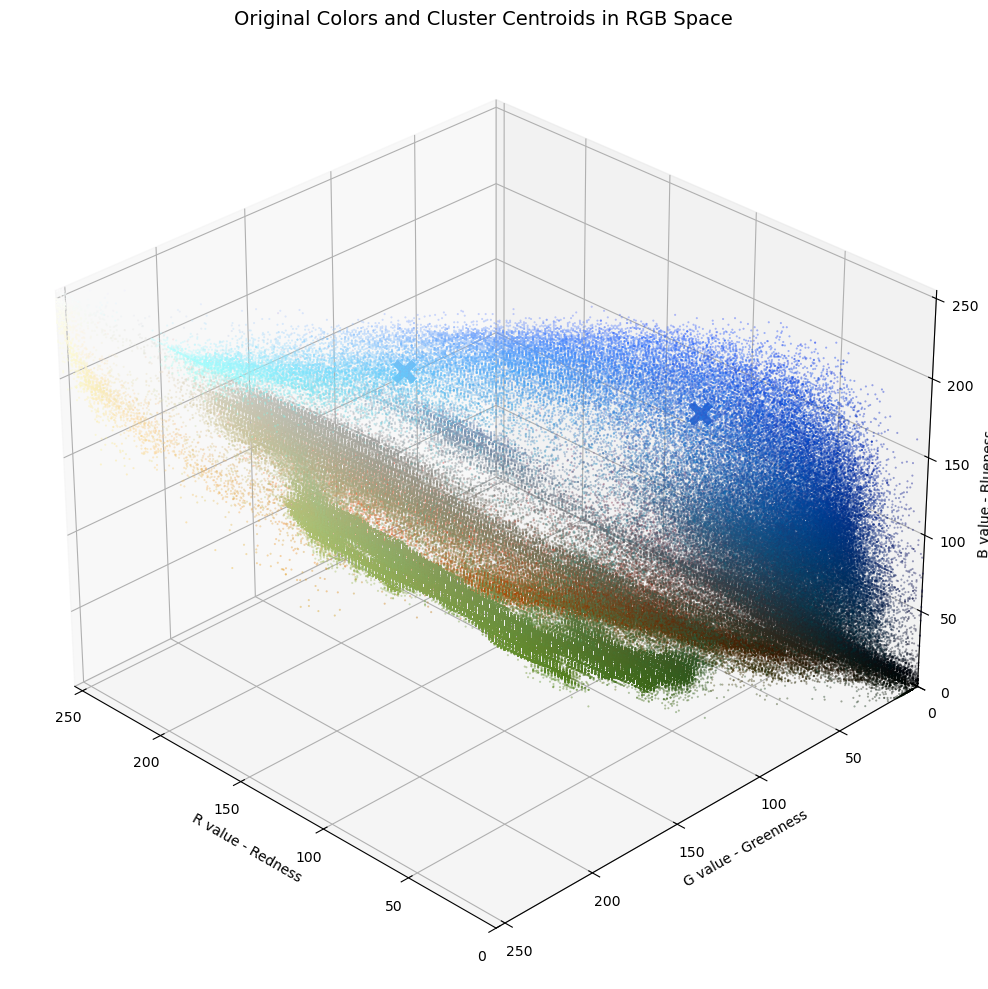

In [43]:
plot_kMeans_RGB_3D(X_img, k_means_2_cluster_centers, k_means_2_labels, K)

In [44]:
K=6
k_means_3=KMeans(init="k-means++", n_init = 12, n_clusters=K)
k_means_3.fit(X_img)
k_means_3_labels=k_means_3.labels_
k_means_3_cluster_centers=k_means_3.cluster_centers_
X_recovered_3=k_means_3_cluster_centers[k_means_3_labels, :]
X_recovered_3=np.reshape(X_recovered_3, original_img.shape)

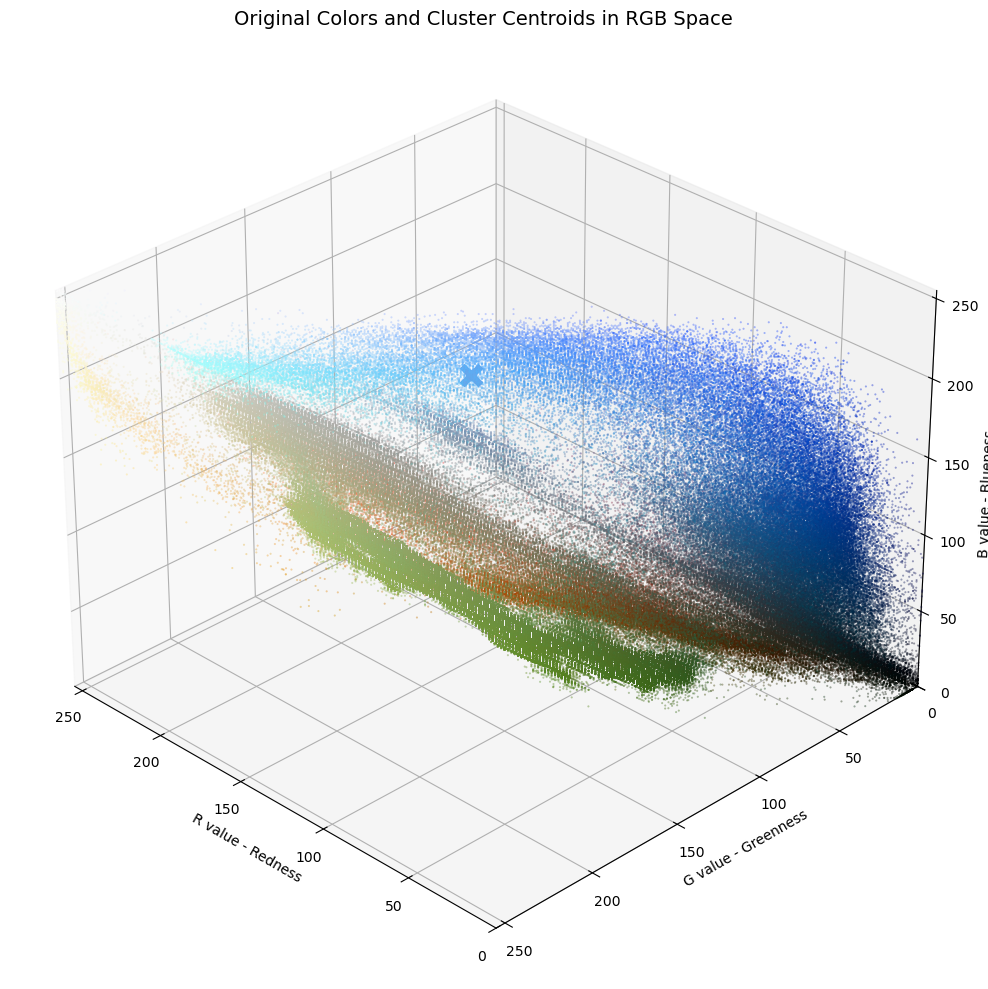

In [45]:
plot_kMeans_RGB_3D(X_img, k_means_3_cluster_centers, k_means_3_labels, K)

In [46]:
K=3
k_means_4=KMeans(init="k-means++", n_init = 12, n_clusters=K)
k_means_4.fit(X_img)
k_means_4_labels=k_means_4.labels_
k_means_4_cluster_centers=k_means_4.cluster_centers_
X_recovered_4=k_means_4_cluster_centers[k_means_4_labels, :]
X_recovered_4=np.reshape(X_recovered_4, original_img.shape)

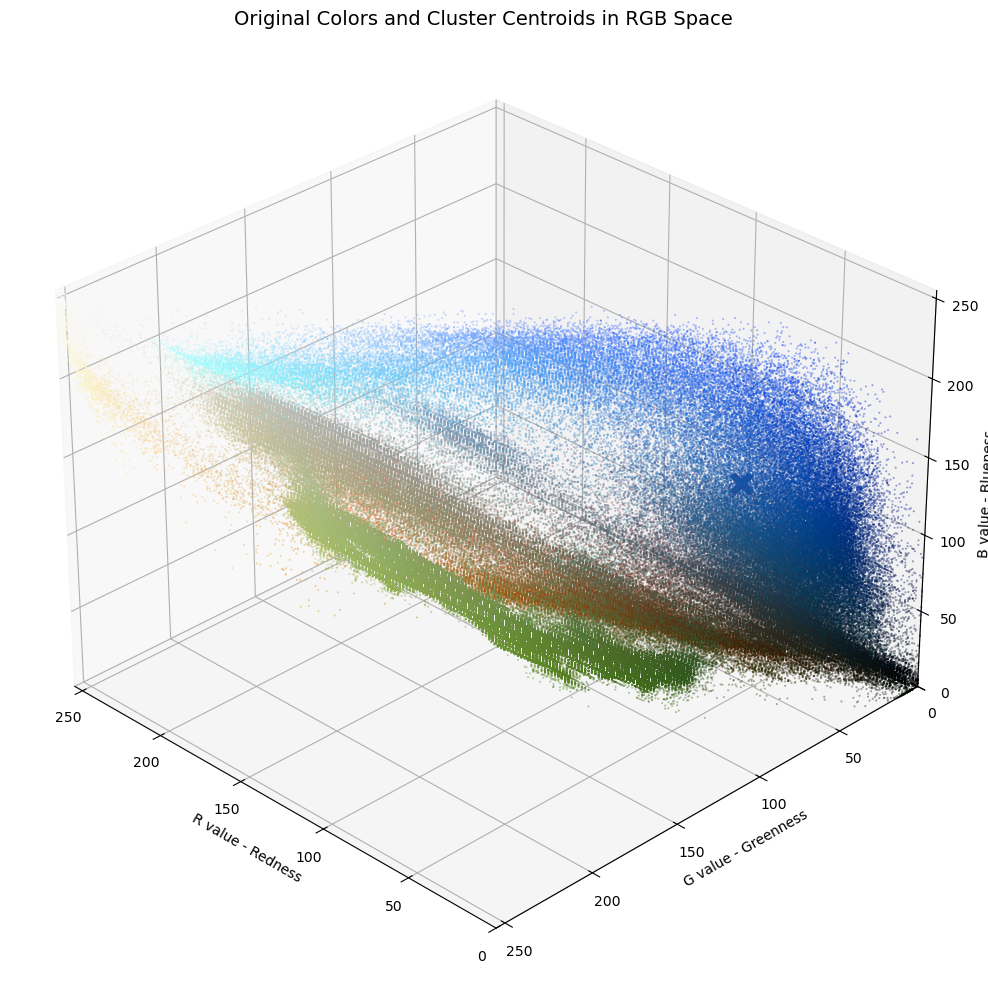

In [47]:
plot_kMeans_RGB_3D(X_img, k_means_4_cluster_centers, k_means_4_labels, K)

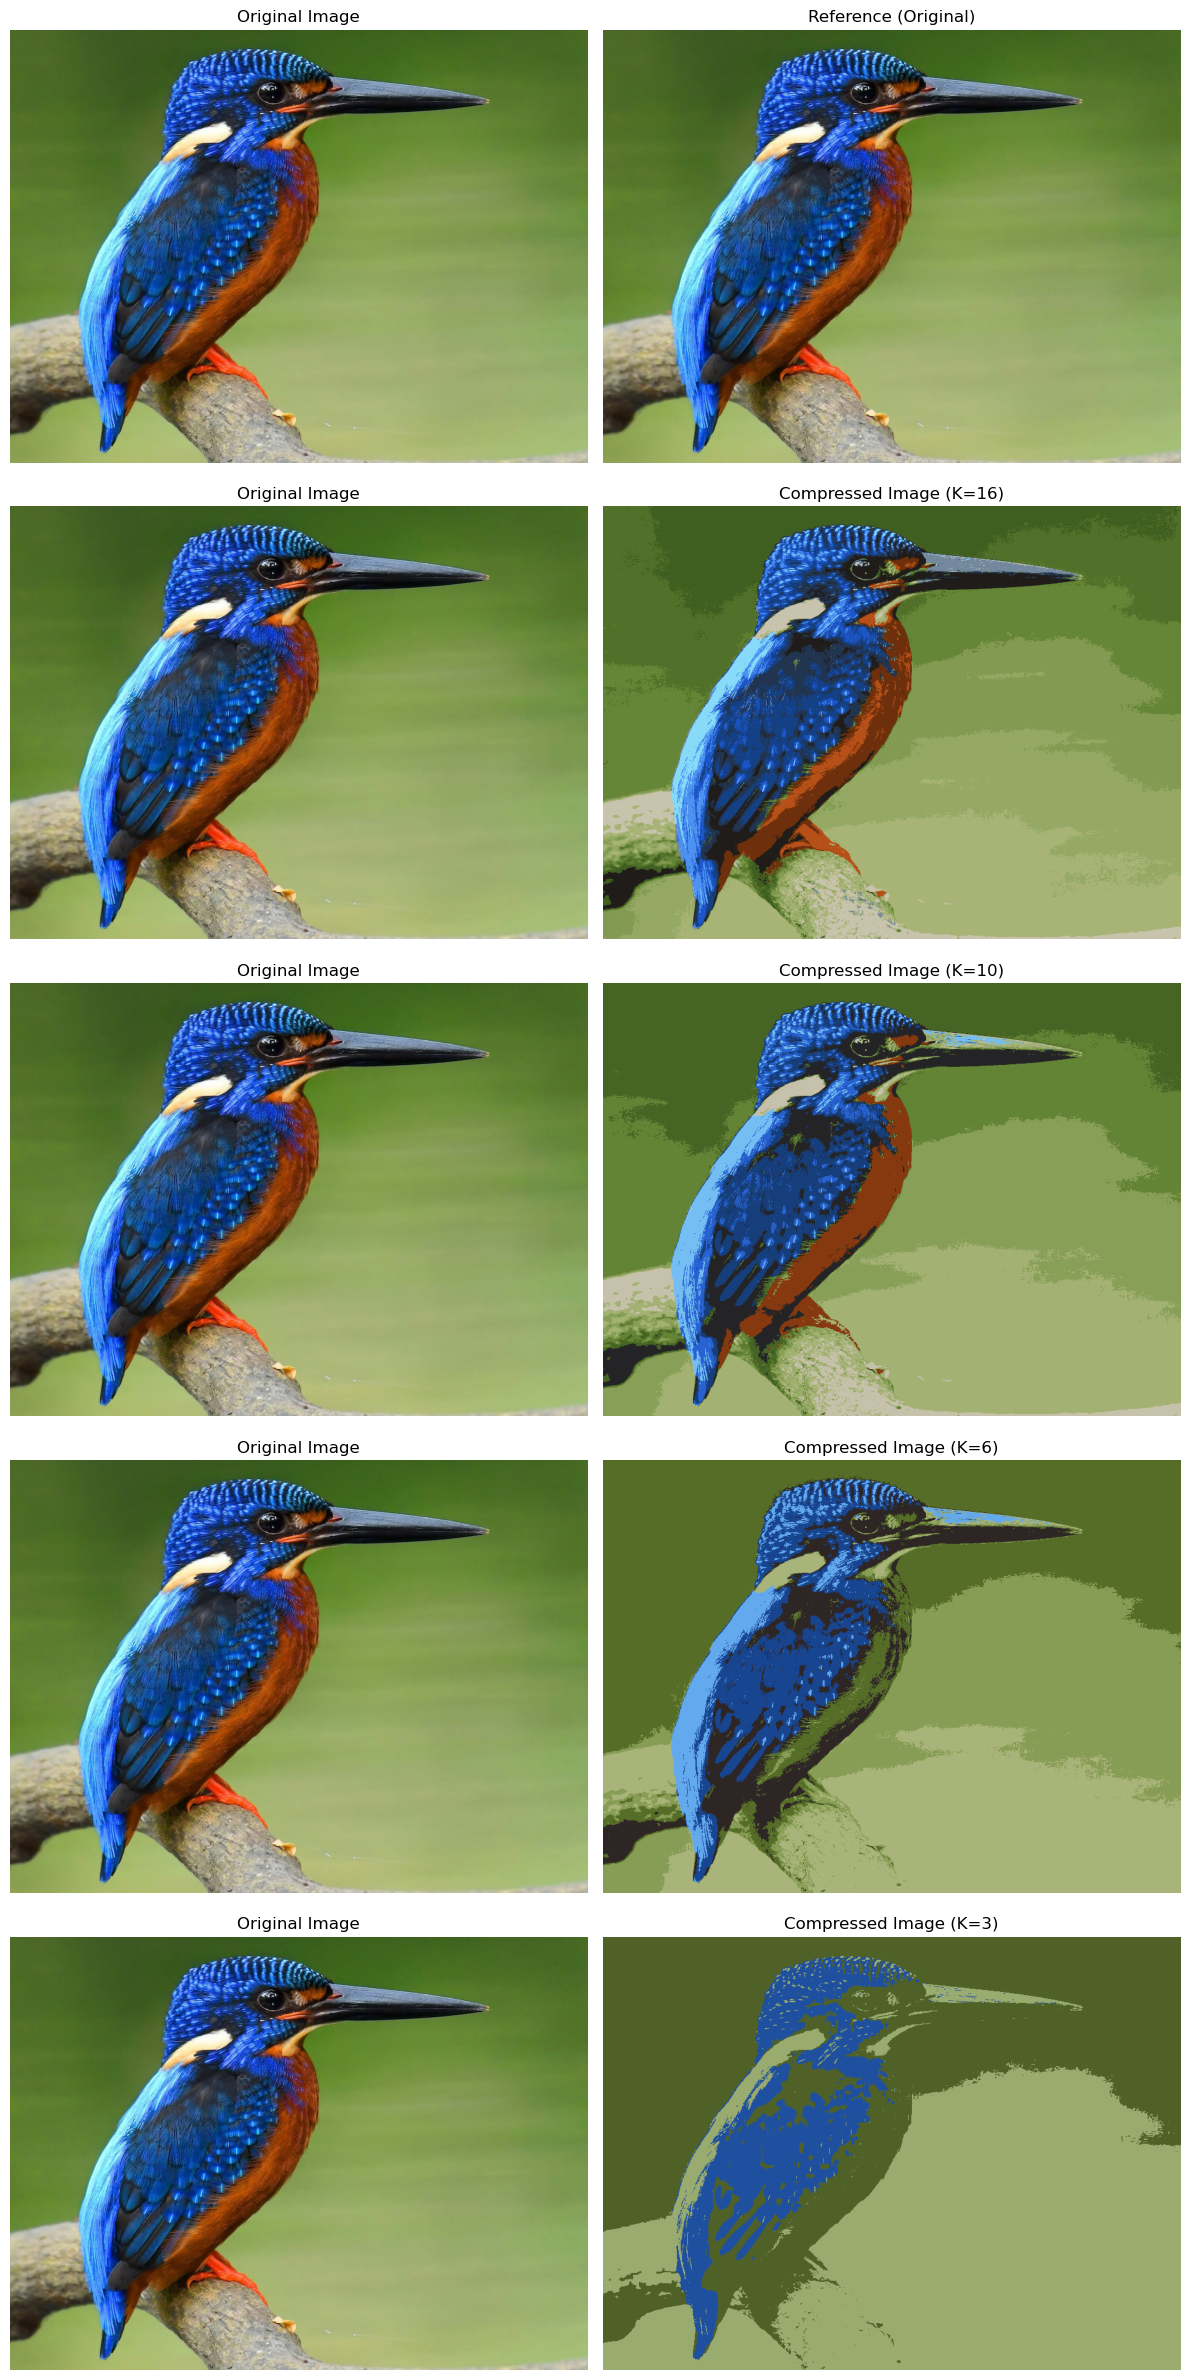

In [48]:
import matplotlib.pyplot as plt

# List of K values and compressed images
K_values = [16, 10, 6, 3]
compressed_images = [X_recovered, X_recovered_2, X_recovered_3, X_recovered_4]

# 5 rows (1 for header + 4 comparisons), 2 columns (original vs compressed)
fig, ax = plt.subplots(5, 2, figsize=(12, 24))

# Header row: Original and a label
ax[0, 0].imshow(original_img)
ax[0, 0].set_title("Original Image")
ax[0, 0].axis('off')

ax[0, 1].imshow(original_img)
ax[0, 1].set_title("Reference (Original)")
ax[0, 1].axis('off')

# Side-by-side comparisons
for i in range(4):
    ax[i+1, 0].imshow(original_img)
    ax[i+1, 0].set_title("Original Image")
    ax[i+1, 0].axis('off')

    ax[i+1, 1].imshow(compressed_images[i]/255)
    ax[i+1, 1].set_title(f"Compressed Image (K={K_values[i]})")
    ax[i+1, 1].axis('off')

plt.tight_layout()
plt.show()
